# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association(like correlation between numerical variable) between two categorical variables. There are more columns for feature engineering but we'll focus on name column and filling missing values in other columns.

To illustrates the concept, we will use titanic dataset. This is a well explored dataset but provides a lot of opportunity for feature engineering. Task is predicting the survival of a passenger, but we will not build model in this homework.


In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

In [2]:

titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [105]:
titanic_df.head(15)


PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name  Sex  SibSp  Parch  \
0                             Braund, Mr. Owen Harris    1      1      0   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0      1      0   
2                              Heikkinen, Miss. Laina    0      0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0      1      0   
4                            Allen, Mr. William Henry    1      0      0   
5                                    Moran, Mr. James    1      0      0   
6                             McCarthy, Mr. Timothy J    1      0      0   
7                      Palsson, Master. Gosta Leonard    1      3      1   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0      0      2   
9                 Nasser, Mrs. Nicholas (Adele Achem)    0      1      0   
10                    Sandstrom, Miss. Marguerite Rut    0      1      1   
11                           Bonnell, Miss. Elizabeth    0      0      0   
12                     Saundercock, Mr. William Henry    1      0      0   
13                        Andersson, Mr. Anders Johan    1      1      5   
14               Vestrom, Miss. Hulda Amanda Adolfina    0      0      0   

              Ticket     Fare Cabin Embarked Cabin_Type    Title       Age  
0          A/5 21171   7.2500     O        S          O      Mr.  22.00000  
1           PC 17599  71.2833   C85        C          C     Mrs.  38.00000  
2   STON/O2. 3101282   7.9250     O        S          O    Miss.  26.00000  
3             113803  53.1000  C123        S          C     Mrs.  35.00000  
4             373450   8.0500     O        S          O      Mr.  35.00000  
5             330877   8.4583     O        Q          O      Mr.  32.36809  
6              17463  51.8625   E46        S          E      Mr.  54.00000  
7             349909  21.0750     O        S          O  Master.   2.00000  
8             347742  11.1333     O        S          O     Mrs.  27.00000  
9             237736  30.0708     O        C          O     Mrs.  14.00000  
10           PP 9549  16.7000    G6        S          G    Miss.   4.00000  
11            113783  26.5500  C103        S          C    Miss.  58.00000  
12         A/5. 2151   8.0500     O        S          O      Mr.  20.00000  
13            347082  31.2750     O        S          O      Mr.  39.00000  
14            350406   7.8542     O        S          O    Miss.  14.00000

In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin(687/891). We can't drop record based on cabin. We'll encode not having a cabin as character **O**

# Q1 (.5 points) fill NAN in cabin with Character 'O'

In [6]:
#Write code here
titanic_df.replace({"Cabin":{np.nan:"O"}}, inplace = True) #replace NaN with a big "O"
titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [7]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter(C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [8]:
#Write code here
titanic_df["Cabin_Type"] = np.nan

titanic_df

for i in range(len(titanic_df)):
    cabin = (titanic_df.loc[i,'Cabin'])
    titanic_df.loc[i,'Cabin_Type'] = cabin[0]


In [9]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Cabin_Type  
0      0         A/5 21171   7.2500     O        S          O  
1      0          PC 17599  71.2833   C85        C          C  
2      0  STON/O2. 3101282   7.9250     O        S          O  
3      0            113803  53.1000  C123        S          C  
4      0            373450   8.0500     O        S          O

Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

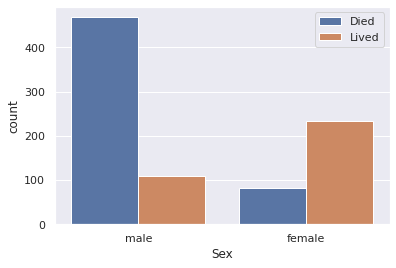

In [10]:
#Write code here
sns.countplot(x ="Sex", data = titanic_df, hue = "Survived")
plt.legend(labels = ["Died", "Lived"]);



# Q4(.5) What is your observation from this plot.

Write observation  here

The saying "Save the women and children first!" was applied during the sinking of the Titanic.  Gender did play a role in survivability.  A male was more likely to die while a woman was more likely to survive.  



We can't use name as a feature for building any machine learning classifier(logistic regression). Let's look at Name columns and see if we can think of a better features for name.

In [11]:
titanic_df['Name'].sample(30)

355                        Vanden Steen, Mr. Leo Peter
385                          Davies, Mr. Charles Henry
792                            Sage, Miss. Stella Anna
511                                  Webber, Mr. James
309                     Francatelli, Miss. Laura Mabel
594                            Chapman, Mr. John Henry
843                         Lemberopolous, Mr. Peter L
596                         Leitch, Miss. Jessie Wills
117                    Turpin, Mr. William John Robert
503                     Laitinen, Miss. Kristina Sofia
206                         Backstrom, Mr. Karl Alfred
166             Chibnall, Mrs. (Edith Martha Bowerman)
531                                  Toufik, Mr. Nakli
100                            Petranec, Miss. Matilda
753                                 Jonkoff, Mr. Lalio
196                                Mernagh, Mr. Robert
298                              Saalfeld, Mr. Adolphe
717                Troutt, Miss. Edwina Celia "Winnie"
577       

# Q5.(.5 points) Can you suggest a feature based on *Name* columns 

It appears that every person on the Titanic had a title in their name. We could look at titles as a feature.  





# Q6(.5 points) Create a new feature named *Title* from the *Name* columns.

Hint: Here are different title

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different title meant that time.

In [12]:
titanic_df['Title'] = None

for index, row in titanic_df.iterrows():
   
    fname = titanic_df.loc[index,'Name'].partition(",")[2]
    titles = fname.split()[0]
    titanic_df.loc[index, 'Title'] = titles

#there is one titles that shows up as "the".  When looking at that record, it is for "the Countess of".  We will
# change this record to 'Countess' for record 759.

#titanic_df.loc[titanic_df['Title'] == 'the'] # to find the record

titanic_df.loc[759, 'Title'] = "Countess"

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plot for male and female.

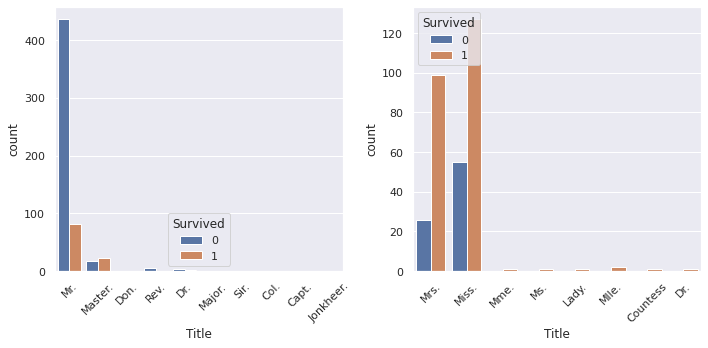

In [13]:
# Write code here
male_df = titanic_df[titanic_df["Sex"] == "male"]
female_df = titanic_df[titanic_df["Sex"] != "male"]


plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(x ="Title", data = male_df, hue = "Survived", ax=axes[0])
sns.countplot(x ="Title", data = female_df, hue = "Survived", ax=axes[1])
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)
plt.show()




# Q 8(.5 points) What is your observation from these plots

The title did not effect the surviability for men, as titled men perished.  For women, higher class titles, unlike Mrs. or Miss, did not have any deaths.  High class women seemed to survive the Titanic.  


Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age nan value by the mean for each **Title** group.

In [14]:
# Write code here
#check to see if there is missing ages
display(titanic_df[titanic_df.Age.isnull()].head(15))

#How many need to be changed
print("No Age in Record:", titanic_df.Age.isnull().sum())

                                                  

PassengerId  Survived  Pclass  \
5             6         0       3   
17           18         1       2   
19           20         1       3   
26           27         0       3   
28           29         1       3   
29           30         0       3   
31           32         1       1   
32           33         1       3   
36           37         1       3   
42           43         0       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
55           56         1       1   

                                              Name     Sex  Age  SibSp  Parch  \
5                                 Moran, Mr. James    male  NaN      0      0   
17                    Williams, Mr. Charles Eugene    male  NaN      0      0   
19                         Masselmani, Mrs. Fatima  female  NaN      0      0   
26                         Emir, Mr. Farred Chehab    male  NaN      0      0   
28                   O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0      0   
29                             Todoroff, Mr. Lalio    male  NaN      0      0   
31  Spencer, Mrs. William Augustus (Marie Eugenie)  female  NaN      1      0   
32                        Glynn, Miss. Mary Agatha  female  NaN      0      0   
36                                Mamee, Mr. Hanna    male  NaN      0      0   
42                             Kraeff, Mr. Theodor    male  NaN      0      0   
45                        Rogers, Mr. William John    male  NaN      0      0   
46                               Lennon, Mr. Denis    male  NaN      1      0   
47                       O'Driscoll, Miss. Bridget  female  NaN      0      0   
48                             Samaan, Mr. Youssef    male  NaN      2      0   
55                               Woolner, Mr. Hugh    male  NaN      0      0   

             Ticket      Fare Cabin Embarked Cabin_Type  Title  
5            330877    8.4583     O        Q          O    Mr.  
17           244373   13.0000     O        S          O    Mr.  
19             2649    7.2250     O        C          O   Mrs.  
26             2631    7.2250     O        C          O    Mr.  
28           330959    7.8792     O        Q          O  Miss.  
29           349216    7.8958     O        S          O    Mr.  
31         PC 17569  146.5208   B78        C          B   Mrs.  
32           335677    7.7500     O        Q          O  Miss.  
36             2677    7.2292     O        C          O    Mr.  
42           349253    7.8958     O        C          O    Mr.  
45  S.C./A.4. 23567    8.0500     O        S          O    Mr.  
46           370371   15.5000     O        Q          O    Mr.  
47            14311    7.7500     O        Q          O  Miss.  
48             2662   21.6792     O        C          O    Mr.  
55            19947   35.5000   C52        S          C    Mr.

No Age in Record: 177


In [15]:
titanic_df['Age1'] = titanic_df["Age"].groupby(titanic_df["Title"]).apply(lambda x: x.fillna(x.mean()))

titanic_df.drop(['Age'], axis=1, inplace =True)
titanic_df.rename(columns={'Age1':'Age'}, inplace =True)
titanic_df.sample(15)

PassengerId  Survived  Pclass  \
676          677         0       3   
677          678         1       3   
703          704         0       3   
522          523         0       3   
302          303         0       3   
822          823         0       1   
758          759         0       3   
582          583         0       2   
116          117         0       3   
183          184         1       2   
178          179         0       2   
736          737         0       3   
852          853         0       3   
798          799         0       3   
268          269         1       1   

                                              Name     Sex  SibSp  Parch  \
676                  Sawyer, Mr. Frederick Charles    male      0      0   
677                        Turja, Miss. Anna Sofia  female      0      0   
703                          Gallagher, Mr. Martin    male      0      0   
522                             Lahoud, Mr. Sarkis    male      0      0   
302                Johnson, Mr. William Cahoone Jr    male      0      0   
822                Reuchlin, Jonkheer. John George    male      0      0   
758                   Theobald, Mr. Thomas Leonard    male      0      0   
582                     Downton, Mr. William James    male      0      0   
116                           Connors, Mr. Patrick    male      0      0   
183                      Becker, Master. Richard F    male      2      1   
178                             Hale, Mr. Reginald    male      0      0   
736        Ford, Mrs. Edward (Margaret Ann Watson)  female      1      3   
852                        Boulos, Miss. Nourelain  female      1      1   
798                   Ibrahim Shawah, Mr. Yousseff    male      0      0   
268  Graham, Mrs. William Thompson (Edith Junkins)  female      0      1   

         Ticket      Fare Cabin Embarked Cabin_Type      Title       Age  
676      342826    8.0500     O        S          O        Mr.  24.50000  
677        4138    9.8417     O        S          O      Miss.  18.00000  
703       36864    7.7417     O        Q          O        Mr.  25.00000  
522        2624    7.2250     O        C          O        Mr.  32.36809  
302        LINE    0.0000     O        S          O        Mr.  19.00000  
822       19972    0.0000     O        S          O  Jonkheer.  38.00000  
758      363294    8.0500     O        S          O        Mr.  34.00000  
582       28403   26.0000     O        S          O        Mr.  54.00000  
116      370369    7.7500     O        Q          O        Mr.  70.50000  
183      230136   39.0000    F4        S          F    Master.   1.00000  
178      250653   13.0000     O        S          O        Mr.  30.00000  
736  W./C. 6608   34.3750     O        S          O       Mrs.  48.00000  
852        2678   15.2458     O        C          O      Miss.   9.00000  
798        2685    7.2292     O        C          O        Mr.  30.00000  
268    PC 17582  153.4625  C125        S          C       Mrs.  58.00000

In [17]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_Type     0
Title          0
Age            0
dtype: int64

There are two record with missing Embarked value.

In [18]:
# Let's drop these two record
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [19]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [20]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_Type      object
Title           object
Age            float64
dtype: object

In [21]:
#will adjust the df to containe the age_adj instead of age...

titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_Type',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [22]:
# Write code here
titanic_clean_df = pd.get_dummies(data = titanic_clean_df, columns = ['Title', 'Cabin_Type'])




In [23]:
titanic_clean_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title_Capt.  \
0         0       3    1  22.0      1      0   7.2500        S            0   
1         1       1    0  38.0      1      0  71.2833        C            0   
2         1       3    0  26.0      0      0   7.9250        S            0   
3         1       1    0  35.0      1      0  53.1000        S            0   
4         0       3    1  35.0      0      0   8.0500        S            0   

   Title_Col.  ...  Title_Sir.  Cabin_Type_A  Cabin_Type_B  Cabin_Type_C  \
0           0  ...           0             0             0             0   
1           0  ...           0             0             0             1   
2           0  ...           0             0             0             0   
3           0  ...           0             0             0             1   
4           0  ...           0             0             0             0   

   Cabin_Type_D  Cabin_Type_E  Cabin_Type_F  Cabin_Type_G  Cabin_Type_O  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             1   
3             0             0             0             0             0   
4             0             0             0             0             1   

   Cabin_Type_T  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [24]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Title_Capt.          uint8
Title_Col.           uint8
Title_Countess       uint8
Title_Don.           uint8
Title_Dr.            uint8
Title_Jonkheer.      uint8
Title_Lady.          uint8
Title_Major.         uint8
Title_Master.        uint8
Title_Miss.          uint8
Title_Mlle.          uint8
Title_Mme.           uint8
Title_Mr.            uint8
Title_Mrs.           uint8
Title_Ms.            uint8
Title_Rev.           uint8
Title_Sir.           uint8
Cabin_Type_A         uint8
Cabin_Type_B         uint8
Cabin_Type_C         uint8
Cabin_Type_D         uint8
Cabin_Type_E         uint8
Cabin_Type_F         uint8
Cabin_Type_G         uint8
Cabin_Type_O         uint8
Cabin_Type_T         uint8
dtype: object

# Q11.(.5) Plot headmap of correlation using titanic_df

<AxesSubplot:>

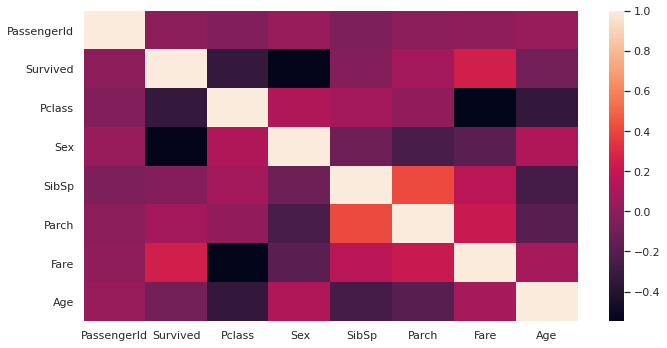

In [25]:
# Write code here
sns.heatmap(data = titanic_df.corr())



# Q 12.(.5) What are your observation from this heatmap.

When looking at the survivability, the highest correlation was with the fare that was paid.  However passenger class and gender where the highest inverse correlation.  

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not the a linear relationship between variables(Survived vs any other attributes).

For categorical variable, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of Pearson’s Chi-Square Test.

Let's use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let's copy paste this here

In [96]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let's work with  titanic dataset again


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select record with Title value = *Master., Miss., Mr. or Mrs.*     into titanic_df_small.

You can check other title doesn't have enough record, hence ignoring them from our analysis.

In [154]:
# Write code here

titanic_df_small= titanic_df[titanic_df['Title'].isin(['Master.','Miss.', 'Mr.', 'Mrs.'])]
display(titanic_df_small.info())

#titanic_df_small[titanic_df_small['Title']=="Dr."]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  862 non-null    int64  
 1   Survived     862 non-null    int64  
 2   Pclass       862 non-null    int64  
 3   Name         862 non-null    object 
 4   Sex          862 non-null    int64  
 5   SibSp        862 non-null    int64  
 6   Parch        862 non-null    int64  
 7   Ticket       862 non-null    object 
 8   Fare         862 non-null    float64
 9   Cabin        862 non-null    object 
 10  Embarked     862 non-null    object 
 11  Cabin_Type   862 non-null    object 
 12  Title        862 non-null    object 
 13  Age          862 non-null    float64
dtypes: float64(2), int64(6), object(6)
memory usage: 101.0+ KB


None

# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [155]:
# Write code here
confusion_matrix = pd.crosstab(titanic_df_small["Survived"], titanic_df_small["Title"])
display(confusion_matrix)

cramers_v(confusion_matrix)

Title     Master.  Miss.  Mr.  Mrs.
Survived                           
0              17     55  436    26
1              23    126   81    98

0.56837187121439

# Q 15(.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [159]:
# Write code here

le = preprocessing.LabelEncoder()
titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])
    
titanic_df_small.sample(15)


<ipython-input-159-83e9f982118c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])


PassengerId  Survived  Pclass  \
515          516         0       1   
233          234         1       3   
737          738         1       1   
783          784         0       3   
325          326         1       1   
718          719         0       3   
847          848         0       3   
66            67         1       2   
756          757         0       3   
528          529         0       3   
690          691         1       1   
159          160         0       3   
298          299         1       1   
799          800         0       3   
805          806         0       3   

                                                  Name  Sex  SibSp  Parch  \
515                       Walker, Mr. William Anderson    1      0      0   
233                     Asplund, Miss. Lillian Gertrud    0      4      2   
737                             Lesurer, Mr. Gustave J    1      0      0   
783                             Johnston, Mr. Andrew G    1      1      2   
325                           Young, Miss. Marie Grice    0      0      0   
718                                McEvoy, Mr. Michael    1      0      0   
847                                 Markoff, Mr. Marin    1      0      0   
66                        Nye, Mrs. (Elizabeth Ramell)    0      0      0   
756                       Carlsson, Mr. August Sigfrid    1      0      0   
528                          Salonen, Mr. Johan Werner    1      0      0   
690                            Dick, Mr. Albert Adrian    1      1      0   
159                         Sage, Master. Thomas Henry    1      8      2   
298                              Saalfeld, Mr. Adolphe    1      0      0   
799  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...    0      1      1   
805                          Johansson, Mr. Karl Johan    1      0      0   

         Ticket      Fare Cabin Embarked Cabin_Type    Title        Age  \
515       36967   34.0208   D46        S          D      Mr.  47.000000   
233      347077   31.3875     O        S          O    Miss.   5.000000   
737    PC 17755  512.3292  B101        C          B      Mr.  35.000000   
783  W./C. 6607   23.4500     O        S          O      Mr.  32.368090   
325    PC 17760  135.6333   C32        C          C    Miss.  36.000000   
718       36568   15.5000     O        Q          O      Mr.  32.368090   
847      349213    7.8958     O        C          O      Mr.  35.000000   
66   C.A. 29395   10.5000   F33        S          F     Mrs.  29.000000   
756      350042    7.7958     O        S          O      Mr.  28.000000   
528     3101296    7.9250     O        S          O      Mr.  39.000000   
690       17474   57.0000   B20        S          B      Mr.  31.000000   
159    CA. 2343   69.5500     O        S          O  Master.   4.574167   
298       19988   30.5000  C106        S          C      Mr.  32.368090   
799      345773   24.1500     O        S          O     Mrs.  30.000000   
805      347063    7.7750     O        S          O      Mr.  31.000000   

     Encoded_title  
515              2  
233              1  
737              2  
783              2  
325              1  
718              2  
847              2  
66               3  
756              2  
528              2  
690              2  
159              0  
298              2  
799              3  
805              2

# Q 16(.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [165]:
# Write code here
display(titanic_df_small.corr())

correlation = titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])
correlation

PassengerId  Survived    Pclass       Sex     SibSp     Parch  \
PassengerId       1.000000 -0.013474 -0.017290  0.046289 -0.054654  0.000296   
Survived         -0.013474  1.000000 -0.336881 -0.539414 -0.034891  0.089020   
Pclass           -0.017290 -0.336881  1.000000  0.136470  0.078599  0.002289   
Sex               0.046289 -0.539414  0.136470  1.000000 -0.119617 -0.251070   
SibSp            -0.054654 -0.034891  0.078599 -0.119617  1.000000  0.415295   
Parch             0.000296  0.089020  0.002289 -0.251070  0.415295  1.000000   
Fare              0.008817  0.252334 -0.555501 -0.180527  0.156795  0.220659   
Age               0.031775 -0.095147 -0.320995  0.109664 -0.275538 -0.192104   
Encoded_title     0.056251 -0.072876 -0.115990  0.028846 -0.223858 -0.103699   

                   Fare       Age  Encoded_title  
PassengerId    0.008817  0.031775       0.056251  
Survived       0.252334 -0.095147      -0.072876  
Pclass        -0.555501 -0.320995      -0.115990  
Sex           -0.180527  0.109664       0.028846  
SibSp          0.156795 -0.275538      -0.223858  
Parch          0.220659 -0.192104      -0.103699  
Fare           1.000000  0.086540      -0.023811  
Age            0.086540  1.000000       0.514236  
Encoded_title -0.023811  0.514236       1.000000

-0.07287583211561174

# Q 17. (.5 points) Whats is your observation between using cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

The cramer's v correlation of about 0.57 shows a very strong correlation (based upon phi > 0.25).  Panda's corr() uses Pearson's correlation.  A value of -0.07 is a very weak inverse correlation.  The two types of correlation are not numerically comparible because they are on a different scales. 

